Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [107]:
import pandas as pd
import ast
df1 = pd.read_csv('CityBike_Station_Riga.csv')
df2 = pd.read_csv('FQ_df.csv')
df = pd.merge(df1, df2, on="Station Name")

In [108]:
df

,Station Name,Latitude,Longitude,Available Bikes,Bars_name,Bars_location,Bars_latitude,Bars_longitude,distance
0,Tallinas/ Miera ielas krustojums,56.965225,24.133422,6,Labietis,"Aristīda Briāna 9A-2, Rīga",56.965118,24.129637,229
1,Tallinas/ Miera ielas krustojums,56.965225,24.133422,6,Fon Stricka Villa,"Aristida Briāna iela 9, Rīga, LV 1010",56.964665,24.131215,147
2,Tallinas/ Miera ielas krustojums,56.965225,24.133422,6,Walters & Grapa,"Miera 41, Rīga, LV1010",56.965192,24.132824,36
3,Tallinas/ Miera ielas krustojums,56.965225,24.133422,6,Nemiers,"Aristrīda Briāna Iela 9a, Rīga",56.965395,24.130983,148
4,Tallinas/ Miera ielas krustojums,56.965225,24.133422,6,Lauvas alus,"30 Tallinas iela, Rīga",56.962247,24.138187,439
...,...,...,...,...,...,...,...,...,...
414,LIDL Kalnciema iela,56.942727,24.066689,0,"Pub ""Visi Savējie""","Nometņu 62a, Rīga, LV-1002",56.937235,24.071920,687
415,LIDL Kalnciema iela,56.942727,24.066689,0,Alus Veranda,"Kalnciema kvartāls, Rīga",56.943220,24.066586,55
416,LIDL Kalnciema iela,56.942727,24.066689,0,Halle Jacks Pots,NaN,56.944096,24.066242,154
417,Dziesmu un Deju svētki (pagaidu stacija),57.011364,24.156114,0,Spots uz priežu saknēm,NaN,57.006632,24.163606,694


In [45]:
df.to_csv('station_and_bars.csv', index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Station Name     419 non-null    object 
 1   Latitude         419 non-null    float64
 2   Longitude        419 non-null    float64
 3   Available Bikes  419 non-null    int64  
 4   Bars_name        419 non-null    object 
 5   Bars_location    308 non-null    object 
 6   Bars_latitude    419 non-null    float64
 7   Bars_longitude   419 non-null    float64
 8   distance         419 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 29.6+ KB
None


In [93]:
print(df.describe())

         Latitude   Longitude  Available Bikes  Bars_latitude  Bars_longitude  \
count  419.000000  419.000000       419.000000     419.000000      419.000000   
mean    56.953749   24.136875         2.451074      56.953153       24.137333   
std      0.018436    0.059863         2.131865       0.018438        0.059386   
min     56.905915   24.010223         0.000000      56.902147       24.002516   
25%     56.945870   24.100839         1.000000      56.946095       24.103901   
50%     56.954617   24.119695         2.000000      56.953490       24.128593   
75%     56.964256   24.180839         3.000000      56.962356       24.180799   
max     57.011364   24.252212         8.000000      57.006632       24.251609   

         distance  
count  419.000000  
mean   424.424821  
std    271.816081  
min      4.000000  
25%    200.000000  
50%    380.000000  
75%    625.500000  
max    999.000000  


In [78]:
print(df.isnull().sum())

Station Name         0
Latitude             0
Longitude            0
Available Bikes      0
Bars_name            0
Bars_location      111
Bars_latitude        0
Bars_longitude       0
distance             0
dtype: int64


##### Although location has 111 empty values, this column is actually not directly related to the issues involved in this investigation, so it can be selectively ignored

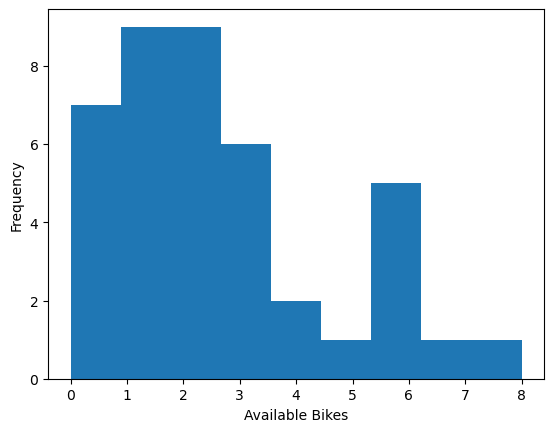

In [102]:
plt.hist(df1['Available Bikes'], bins = 9)
plt.xlabel('Available Bikes')
plt.ylabel('Frequency')
plt.show()

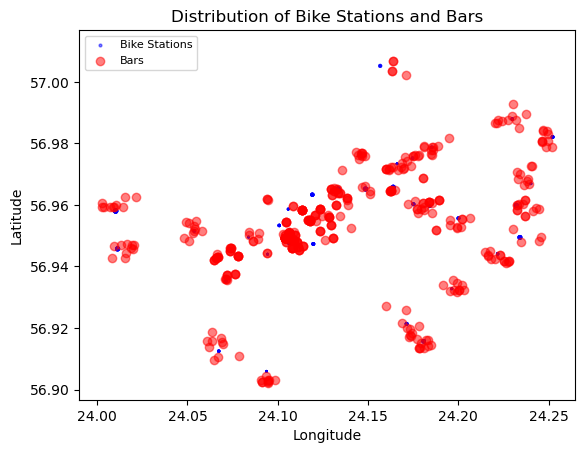

In [85]:
fig, ax = plt.subplots()

# Plot for Stations
station_scatter = ax.scatter(df['Longitude'], df['Latitude'], c='Blue', 
                             s=df['Available Bikes'], alpha=0.5)

# Plot for Bars
bar_scatter = ax.scatter(df['Bars_longitude'], df['Bars_latitude'], c='Red', alpha=0.5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Distribution of Bike Stations and Bars')

ax.legend((station_scatter, bar_scatter),
           ('Bike Stations', 'Bars'),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=8)

plt.show()

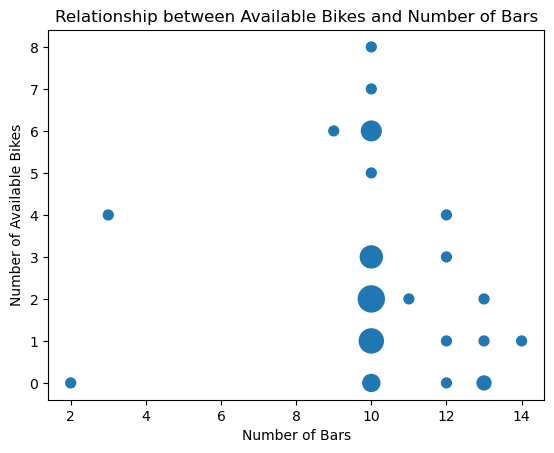

In [110]:
bars_per_station = df.groupby('Station Name').size()


new_df = pd.DataFrame({
    'Station Name': df['Station Name'].unique(),
    'Available Bikes': df.groupby('Station Name')['Available Bikes'].first().values,
    'Bars Count': bars_per_station.values
})
counts_df = new_df.groupby(['Bars Count', 'Available Bikes']).size().reset_index(name='counts')

base_dot_size = 50

plt.scatter(counts_df['Bars Count'], counts_df['Available Bikes'], s=counts_df['counts']*base_dot_size)
plt.xlabel('Number of Bars')
plt.ylabel('Number of Available Bikes')
plt.title('Relationship between Available Bikes and Number of Bars')
plt.show()

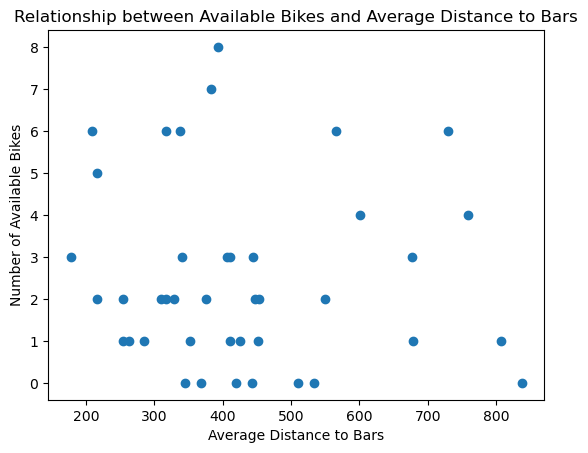

In [67]:
avg_distance = df.groupby('Station Name')['distance'].mean()

new_df['Average Distance'] = avg_distance.values

plt.scatter(new_df['Average Distance'], new_df['Available Bikes'])
plt.xlabel('Average Distance to Bars')
plt.ylabel('Number of Available Bikes')
plt.title('Relationship between Available Bikes and Average Distance to Bars')
plt.show()

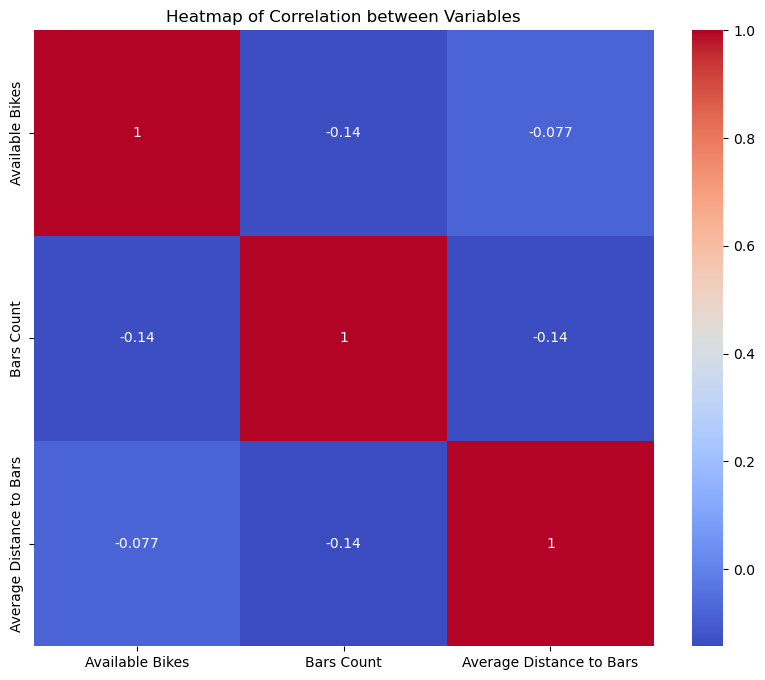

In [68]:
import seaborn as sns

new_df = pd.DataFrame()
new_df['Available Bikes'] = df.groupby('Station Name')['Available Bikes'].mean()  # Use mean as aggregation function
new_df['Bars Count'] = bars_per_station.values
new_df['Average Distance to Bars'] = avg_distance.values

correlation_matrix = new_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation between Variables')
plt.show()

In [69]:
new_df.to_csv('new_result.csv', index=False)

##### I attempted to use different information to create scatter plots:

##### 1. The scatter plot of latitude and longitude doesn't reveal any significant insights because these bars were searched based on the surrounding areas of the stations.
##### 2. Both the number of bars versus available bicycles and the average distance to bars versus available bicycles show a weak negative correlation. That is, the more bars there are nearby, the fewer available bicycles there are, and the farther the bars are, the fewer available bicycles there are.
##### 3. Heat maps were created based on this data. It does show a weak negative correlation among the variables, but the correlation is not strong.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [86]:
import sqlite3
import pandas as pd

df = pd.read_csv('station_and_bars.csv')

conn = sqlite3.connect('C:\\Users\\31332\\OneDrive\\Documents\\GitHub\\Statistical-Modelling-Project-Sean\\data\\my_database.db')

df.to_sql('stations_and_bars', conn, if_exists='replace', index=False)

df_loaded = pd.read_sql('SELECT * FROM stations_and_bars', conn)
print(df_loaded.head())

conn.close()

                       Station Name   Latitude  Longitude  Available Bikes  \
0  Tallinas/ Miera ielas krustojums  56.965225  24.133422                6   
1  Tallinas/ Miera ielas krustojums  56.965225  24.133422                6   
2  Tallinas/ Miera ielas krustojums  56.965225  24.133422                6   
3  Tallinas/ Miera ielas krustojums  56.965225  24.133422                6   
4  Tallinas/ Miera ielas krustojums  56.965225  24.133422                6   

           Bars_name                          Bars_location  Bars_latitude  \
0           Labietis             Aristīda Briāna 9A-2, Rīga      56.965118   
1  Fon Stricka Villa  Aristida Briāna iela 9, Rīga, LV 1010      56.964665   
2    Walters & Grapa                 Miera 41, Rīga, LV1010      56.965192   
3            Nemiers         Aristrīda Briāna Iela 9a, Rīga      56.965395   
4        Lauvas alus                 30 Tallinas iela, Rīga      56.962247   

   Bars_longitude  distance  
0       24.129637       229  
1 

Look at the data before and after the join to validate your data.